In [1]:
import numpy as np
from IPython import display

import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional  as F

## 1. Create Data

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Converting to tensor 

In [9]:
arr = iris[iris.columns[0:4]].values

#### Predictiors or Independent features

In [10]:
data = torch.tensor(arr ,dtype = torch.float )
data[:5]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

#### Labels

In [11]:
# labels = np.zeros(shape = len(iris))

In [12]:
labels = torch.zeros(size = ( len(iris), )  ,dtype = torch.long)

In [13]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

In [14]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
labels[iris["species"] == "versicolor"] = 1

In [16]:
labels[iris["species"] == "virginica"]  = 2

    setosa       0
    versicolor   1
    virginica    2

In [17]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

## 3. Separate the data into DataLoaders

In [18]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [19]:
# scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(data, labels, test_size=.2)


# convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
#int(train_data.tensors[0].shape[0]/4) -- Hard-coding is better to avoid huge batches!
batchsize    = 16 
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) 

In [29]:
for X,y in train_loader:
    print(X.shape,y.shape)

torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([16, 4]) torch.Size([16])
torch.Size([8, 4]) torch.Size([8])


In [30]:
for X,y in test_loader:
    print(X.shape,y.shape)

torch.Size([30, 4]) torch.Size([30])


## 4. Create the model class

In [20]:
class theModelClass(nn.Module):
    
    def __init__(self, dropoutRate):
        super().__init__()

        ### layers
        self.input  = nn.Linear(4,12)
        self.hidden = nn.Linear(12,12)
        self.output = nn.Linear(12, 3)

        # parameters
        self.dr = dropoutRate

    # forward pass
    def forward(self,x):

        # Pass the data through the input layer
        x = F.relu( self.input(x) )

        # dropout after input layer
        # training=self.training means to turn off during eval mode
        x = F.dropout(x, p = self.dr, training = self.training) 

        # pass the data through the hidden layer
        x = F.relu( self.hidden(x) )

        # dropout after hidden layer
        # training=self.training means to turn off during eval mode
        x = F.dropout( x ,p=self.dr, training=self.training) 

        # output layer
        x = self.output(x)
        # no dropout here!!
        
        return x

In [21]:
# test the model
tmpnet = theModelClass(dropoutRate = .25)

# run some random data through
tmpdata = torch.randn((10,4))

yhat = tmpnet(tmpdata)
yhat

tensor([[ 0.7076, -0.0478,  0.5200],
        [ 0.5172,  0.1413,  0.4270],
        [ 0.7314, -0.0115,  0.2695],
        [ 0.5017,  0.1478,  0.3980],
        [ 0.5335,  0.2530,  0.2541],
        [ 0.8100, -0.0026,  0.5453],
        [ 0.5026,  0.1502,  0.0703],
        [ 0.5218,  0.0398,  0.3414],
        [ 0.6459, -0.0284,  0.1763],
        [ 0.6330,  0.1560,  0.4352]], grad_fn=<AddmmBackward0>)

## 5. Functions to create the model , LossFunc and Optimizer

In [22]:
def createANewModel(dropoutrate , LR):

    # grab an instance of the model class
    ANNiris = theModelClass(dropoutrate)

   
    # loss function
    # Useful when training a classification problem with `C` classes.
    lossfunc = nn.CrossEntropyLoss()

    # Optimzer 

    optimizer = torch.optim.SGD(params = ANNiris.parameters() , lr = LR)
    

    return ANNiris,lossfunc,optimizer

## 6. Custom Model training function

In [31]:
numepochs = 1000

def trainTheModel(Model,lossfunc,optimizer, train_loader ,test_loader, epochs ):

    # initialize accuracies as empties (not storing losses here)
    trainAcc = []
    testAcc  = []


  # loop over epochs
    for epochi in range(epochs):

        # switch training mode on 
        Model.train() 

        # loop over training data batches
        batchAcc = []
        
        for X,y in train_loader:

            # forward pass and loss
            yHat_train = Model(X)
            loss = lossfunc(yHat_train,y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # compute training accuracy just for this batch
            batchAcc.append( 100*torch.mean( (torch.argmax(yHat_train,axis=1) == y).float() ).item() )
           
            
        # end of batch loop...

        # now that we've trained through the batches, get their average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # test accuracy
        Model.eval()    # switch training off
        
        X,y = next(iter(test_loader))  # extract X,y from test dataloader
        
        yHat_test = Model(X)
        
        testAcc.append( 100*torch.mean( (torch.argmax(yHat_test,axis=1) == y).float() ).item() )
  
    # function output
    return trainAcc,testAcc

## 7. Model Training and Testing

In [32]:
dropoutrate = 0
LR = 0.01
num_epochs = 1000

ANNiris,lossfunc,optimizer = createANewModel(dropoutrate , LR)

# train the model (note the inputs!)
trainAcc,testAcc = trainTheModel(Model = ANNiris,
                                lossfunc = lossfunc,
                                optimizer = optimizer ,
                                train_loader = train_loader,
                                test_loader = test_loader,
                                epochs = num_epochs)   

## 8. Data Visualization

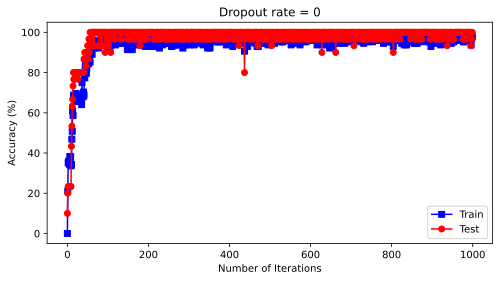

In [33]:
fig = plt.figure(figsize=(8,4) , dpi = 130 )

plt.plot(trainAcc,'bs-')
plt.plot(testAcc,'ro-')

plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy (%)')

plt.legend(['Train','Test'])

plt.title(f'Dropout rate = {dropoutrate}')

plt.show()

## 9. Experiment

In [34]:
LR = 0.01
num_epochs = 1000

dropoutRates = np.arange(10)/10

results = np.zeros((len(dropoutRates),2))

i = 0
for p in dropoutRates:

    ANNiris,lossfunc,optimizer = createANewModel(dropoutrate = p , LR= LR)

    # train the model (note the inputs!)
    trainAcc,testAcc = trainTheModel(Model = ANNiris,
                                    lossfunc = lossfunc,
                                    optimizer = optimizer ,
                                    train_loader = train_loader,
                                    test_loader = test_loader,
                                    epochs = num_epochs) 
    
    # store accuracies from last 100 epochs
    results[i,0] = np.mean(trainAcc[-100:])
    results[i,1] = np.mean(testAcc[-100:])
    i += 1

## 10. Visualization

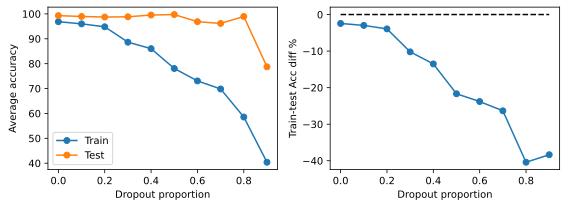

In [39]:
# plot the experiment results
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(dropoutRates,results,'o-')
ax[0].set_xlabel('Dropout proportion')
ax[0].set_ylabel('Average accuracy')
ax[0].legend(['Train','Test'])

ax[1].plot(dropoutRates,-np.diff(results,axis=1),'o-')
ax[1].plot([0,.9],[0,0],'k--')
ax[1].set_xlabel('Dropout proportion')
ax[1].set_ylabel('Train-test Acc diff %')

fig.tight_layout()

plt.show()